<a href="https://colab.research.google.com/github/aettikang/bigdata_analysis_basic/blob/main/10%EC%A3%BC%EC%B0%A8%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# *   sklearn의 train_test_split() 패러미터
1.   arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
1.   test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
2.   train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
1.   random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)
1.   shuffle : 셔플여부설정 (default = True)
1.   stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.


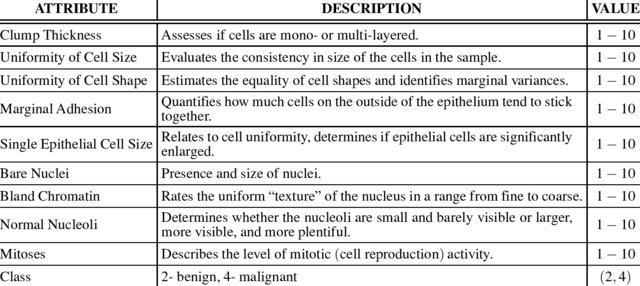

In [ ]:
from sklearn.datasets import load_breast_cancer 
cancer=load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline



*   스케일러는 MinMaxScaler()로 사용
*   SVM은 3가지로 준비
1.   default : rbf
2.   kernel = poly
1.   kernel = linear









In [ ]:
scaler=MinMaxScaler() 
base_model = SVC(random_state=1) #rbf
linear_model=SVC(kernel="linear", random_state=1) 
poly_model=SVC(kernel="poly", random_state=1)

pipe=Pipeline([('scaler',scaler), ('base_model',base_model)])

In [ ]:
from sklearn.model_selection import KFold,GridSearchCV 
kfold=KFold(n_splits=3, shuffle=True, random_state=1)

param_grid={'base_model__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'base_model__gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'base_model__degree':[1,2,3,4,5]}

In [ ]:
grid_model=GridSearchCV(estimator=pipe, param_grid=param_grid, cv=kfold, n_jobs=-1).fit(X_train, y_train)

In [ ]:
print('교차검증 점수 : ', grid_model.best_score_) 
print('최적의 하이퍼 파라메터 조합 :', grid_model.best_params_) 
print('학습 평가 : ', grid_model.score(X_train, y_train)) 
print('테스트 평가 : ', grid_model.score(X_test, y_test))

교차검증 점수 :  0.9741784037558686
최적의 하이퍼 파라메터 조합 : {'base_model__C': 10, 'base_model__degree': 1, 'base_model__gamma': 0.0001}
학습 평가 :  0.9859154929577465
테스트 평가 :  0.972027972027972
